# Michele Banfi 869294

The aim of the exercise is to create and use the grover algorithm; composed of the oracle and the diffuser. In the last part of the exercise we can demostrate the approximate number of iterations needed for a good results.

In [1]:
# import libraries
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# diffuser implementation. The diffuser perform the inversion by the mean
def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.mcp(np.pi, list(range(n-1)), n-1)
    qc.x(range(n))
    qc.h(range(n))

In [3]:
# oracle implementation. The oracle flip the phase of the correct solution
def oracle(qc, n, target):
    for i in range(len(target)):
        if target[i] == '0':
            qc.x(i)
    qc.mcp(np.pi, list(range(n-1)), n-1)
    for i in range(len(target)):
        if target[i] == '0':
            qc.x(i)

In [4]:
def circuit(n, target):

    target_bin = np.binary_repr(target, n)
    
    qc = QuantumCircuit(n)

    # qubits initialization
    qc.h(range(n))
    
    qc.barrier()
    
    # oracle
    oracle(qc, n, target_bin)
    
    qc.barrier()
    
    # diffuser
    diffuser(qc, n)
    
    qc.measure_all()

    return qc

In [5]:
# this method run the circuit and return the probability of observing the correct result
def run_circuit(n, target):
    qc = circuit(n, target)

    # the binary target is used in the oracle
    target_bin = np.binary_repr(target, n)

    result = Sampler().run([qc], shots=100).result()[0]
    co = result.data.meas.get_counts()

    # reverse target bin
    target_bin = target_bin[::-1]
    p = co[target_bin] / sum(co.values())
    return p

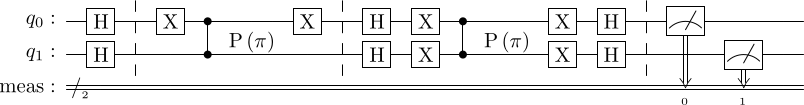

In [6]:
# we can plot the circuit
circuit_drawer(circuit(2, 1), output='latex')

In [11]:
results = []

# iterate the number of qubits
for i in range(2, 11):

    # append the result of each iteration
    results.append(run_circuit(i, 1))

Text(0, 0.5, 'Probability')

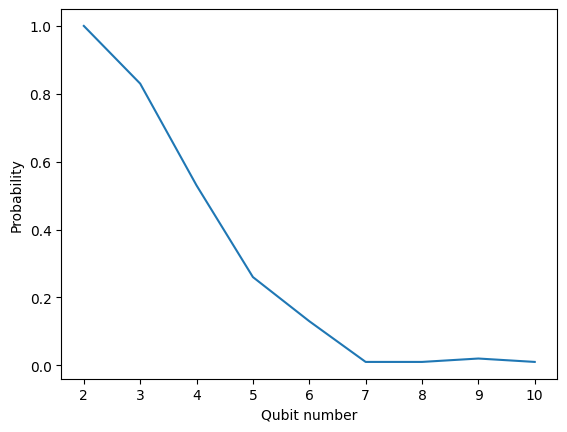

In [12]:
# plot the probability of observing the right result for number of qubits
plt.plot(range(2, 11), results)
plt.xlabel('Qubit number')
plt.ylabel('Probability')

Now we increase the number of oracle-diffuser pair to see which are the result. So we will iterate

In [15]:
# override of the previous function to add a cycle to insert oracle-diffuser pairs. Reps represent the number of the pair repetition
def circuit(n, target, reps):
    
    target_bin = np.binary_repr(target, n)
    
    qc = QuantumCircuit(n)

    qc.h(range(n))
    
    qc.barrier()
    
    for _ in range(reps):
        # oracle
        oracle(qc, n, target_bin)
        
        # diffuser
        diffuser(qc, n)
    
    qc.measure_all()
    
    result = Sampler().run([qc], shots=100).result()[0]
    co = result.data.meas.get_counts()

    maxim = max(co.values())
    print(maxim, "with reps", reps)
    return maxim
    # return p

In [24]:
results = []

# fix the number of qubits and iterate through the number of repetitions
for i in range(2, 30):

    # store the result which are the number of occurrence of the correct solution
    results.append(circuit(7, 1, i))

21 with reps 2
34 with reps 3
50 with reps 4
70 with reps 5
87 with reps 6
90 with reps 7
100 with reps 8
98 with reps 9
88 with reps 10
70 with reps 11
63 with reps 12
49 with reps 13
22 with reps 14
12 with reps 15
6 with reps 16
5 with reps 17
3 with reps 18
14 with reps 19
20 with reps 20
37 with reps 21
66 with reps 22
73 with reps 23
95 with reps 24
98 with reps 25
100 with reps 26
99 with reps 27
89 with reps 28
75 with reps 29


Text(0, 0.5, 'Probability')

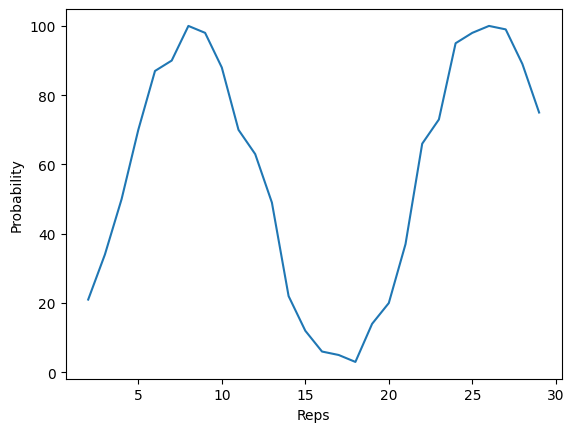

In [26]:
plt.plot(range(2, 30), results)
plt.xlabel('Reps')
plt.ylabel('Probability')

We can see that around $\sqrt{2^n}$ reps (where $n$ is the number of qubits) we obtain the highest probability, and of course at multiples of that value the probability is higher.